# Project 1

## Step 1: Load the data and perform basic operations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

##### 1. Load the data in using pandas.

In [2]:
act = pd.read_csv('../data/act.csv', index_col=0)
sat = pd.read_csv('../data/sat.csv', index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [3]:
act[0:10]

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat[0:10]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

| ACT           | Description                               |
| ------------  |:----------------------------------------- |
| State         | name of the state for which we are reviewing statistics
| Participation | share of high school graduates that participate in taking the test
| English       | average English score for test takers     
| Math          | average Math score for test takers
| Reading       | average Reading score for test takers
| Science       | average Science score for test takers
| Composite     | average Composite score for test takers

| SAT           | Description                               |
| ------------  |:----------------------------------------- |
| State         | name of the state for which we are reviewing statistics
| Participation | share of high school graduates that participate in taking the test
| Evidence-Based Reading and Writing | average reading/writing score for test takers     
| Math          | average Math score for test takers
| Total         | average total score for test takers

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete. It is not clear what the Participation column is based on, but upon further external research, I've assumed participation rate is based on the number of graduating high school students in each state.

##### 5. Print the types of each column.

In [5]:
sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [6]:
act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

The Participation column needs to be reassigned from a string to a float value .

In [7]:
sat['Participation'] = sat['Participation'].map(lambda x: float(x.replace('%', '')))

In [8]:
act['Participation'] = act['Participation'].map(lambda x: float(x.replace('%', '')))

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [9]:
sat_part_dict = dict(zip(sat['State'], sat['Participation']))

In [10]:
sat_rw_dict = dict(zip(sat['State'], sat['Evidence-Based Reading and Writing']))

In [11]:
sat_math_dict = dict(zip(sat['State'], sat['Math']))

In [12]:
sat_total_dict = dict(zip(sat['State'], sat['Total']))

***

In [13]:
act_part_dict = dict(zip(act['State'], act['Participation']))

In [14]:
act_eng_dict = dict(zip(act['State'], act['English']))

In [15]:
act_math_dict = dict(zip(act['State'], act['Math']))

In [16]:
act_read_dict = dict(zip(act['State'], act['Reading']))

In [17]:
act_sci_dict = dict(zip(act['State'], act['Science']))

In [18]:
act_comp_dict = dict(zip(act['State'], act['Composite']))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [19]:
sat_list_dict = sat.to_dict('list')
sat_list_dict['State'][0:5]

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California']

##### 9. Merge the dataframes on the state column.

In [20]:
merged = pd.merge(act, sat, on='State')
merged[0:5]

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [21]:
merged.columns = ['State',
                  'ACT_Participation',
                  'ACT_English',
                  'ACT_Math',
                  'ACT_Reading',
                  'ACT_Science',
                  'ACT_Composite',
                  'SAT_Participation',
                  'SAT_Evidence-Based Reading and Writing',
                  'SAT_Math',
                  'SAT_Total'
                 ]

merged[0:5]

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [22]:
pd.DataFrame(merged.select_dtypes(include=[np.number]).max()).rename(columns={0: "Max"})

,Max
ACT_Participation,100.0
ACT_English,25.5
ACT_Math,25.3
ACT_Reading,26.0
ACT_Science,24.9
ACT_Composite,25.5
SAT_Participation,100.0
SAT_Evidence-Based Reading and Writing,644.0
SAT_Math,651.0
SAT_Total,1295.0


In [23]:
pd.DataFrame(merged.select_dtypes(include=[np.number]).min()).rename(columns={0: "Min"})

,Min
ACT_Participation,8.0
ACT_English,16.3
ACT_Math,18.0
ACT_Reading,18.1
ACT_Science,2.3
ACT_Composite,17.8
SAT_Participation,2.0
SAT_Evidence-Based Reading and Writing,482.0
SAT_Math,52.0
SAT_Total,950.0


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [24]:
numeric_df = merged.select_dtypes(include=[np.number])

In [25]:
col_values = [values for col_name, values in numeric_df.iteritems()]

In [26]:
def stdev(col_values):
    for value in col_values:
        sd_sum = 0
        for value in col_values:
            sd_sum += ((value - col_values.mean()) ** 2)
        stdev = (sd_sum * (1/(len(col_values)-1))) ** 0.5
    return stdev

In [27]:
sd = [stdev(column) for column in col_values]

sd

[32.14084201588683,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341,
 35.276632270013046,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046]

In [28]:
merged.describe()

,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,547.627451,1126.098039
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,522.000000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [29]:
numeric_df.loc['SD'] = sd
numeric_df.tail()

/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total
47,29.000000,20.900000,21.900000,22.100000,22.000000,21.900000,64.000000,541.000000,534.000000,1075.000000
48,69.000000,20.000000,19.400000,21.200000,20.500000,20.400000,14.000000,558.000000,528.000000,1086.000000
49,100.000000,19.700000,20.400000,20.600000,20.900000,20.500000,3.000000,642.000000,649.000000,1291.000000
50,100.000000,19.400000,19.800000,20.800000,20.600000,20.200000,3.000000,626.000000,604.000000,1230.000000
SD,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [30]:
merged.sort_values('ACT_Participation', ascending=False).tail()

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540,531,1071
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,1062
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532,520,1052
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513,499,1012


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [133]:
merged_filtered = merged[(merged.SAT_Participation >= 50) & (merged.ACT_Participation >= 50)]
merged_filtered = pd.DataFrame(merged_filtered)
merged_filtered

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535,515,1050
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544,541,1085
40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543,521,1064


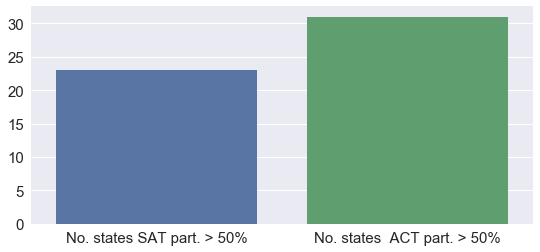

In [129]:
plt.figure(figsize=(9,4))
sns.set(font_scale=1.5)
bar1 = merged[(merged.SAT_Participation >= 50)]
bar2 = merged[(merged.ACT_Participation >= 50)]
x = ['No. states SAT part. > 50%','No. states  ACT part. > 50%']
y = [len(bar1), len(bar2)]
sns.barplot(x,y)

## Step 3: Visualize the data

In [32]:
merged.set_value(20, 'ACT_Science', 23.2)
merged.set_value(20, 'SAT_Math', 524)
merged.loc[20]

/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/Users/namanbhandari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


State                                     Maryland
ACT_Participation                               28
ACT_English                                   23.3
ACT_Math                                      23.1
ACT_Reading                                   24.2
ACT_Science                                   23.2
ACT_Composite                                 23.6
SAT_Participation                               69
SAT_Evidence-Based Reading and Writing         536
SAT_Math                                       524
SAT_Total                                     1060
Name: 20, dtype: object

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

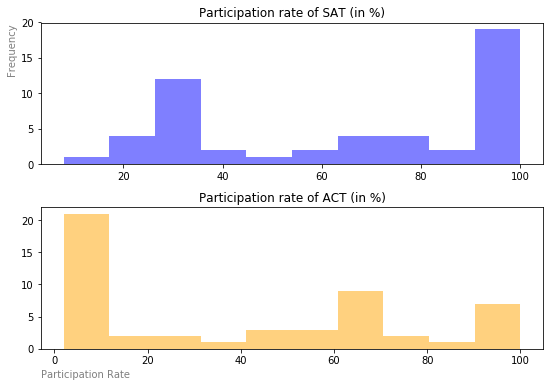

In [100]:
fig, ax = plt.subplots(2)
fig.set_size_inches(9, 6)
ax[0].hist(merged['ACT_Participation'], bins = 10, color='b', alpha = 0.5)
ax[1].hist(merged['SAT_Participation'], bins = 10, color='orange', alpha = 0.5)
plt.xlabel("Participation Rate", position = (0,0), ha = 'left', color = 'grey')
plt.ylabel("Frequency", position = (0, 2.3), ha = 'right', color = 'grey')
fig.subplots_adjust(hspace=.3)
ax[0].title.set_text('Participation rate of SAT (in %)')
ax[1].title.set_text('Participation rate of ACT (in %)')

##### 17. Plot the Math(s) distributions from both data sets.

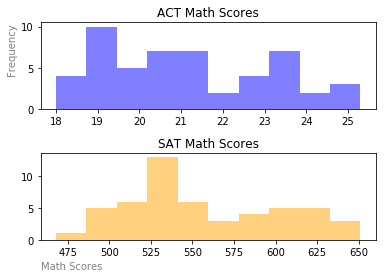

In [34]:
fig, ax = plt.subplots(2)
ax[0].hist(merged['ACT_Math'], bins = 10, color='b', alpha = 0.5)
ax[1].hist(merged['SAT_Math'], bins = 10, color='orange', alpha = 0.5)
plt.xlabel("Math Scores", position = (0,0), ha = 'left', color = 'grey')
plt.ylabel("Frequency", position = (0, 2.5), ha = 'right', color = 'grey')
fig.subplots_adjust(hspace=.5)
ax[0].title.set_text('ACT Math Scores')
ax[1].title.set_text('SAT Math Scores')

##### 18. Plot the Verbal distributions from both data sets.

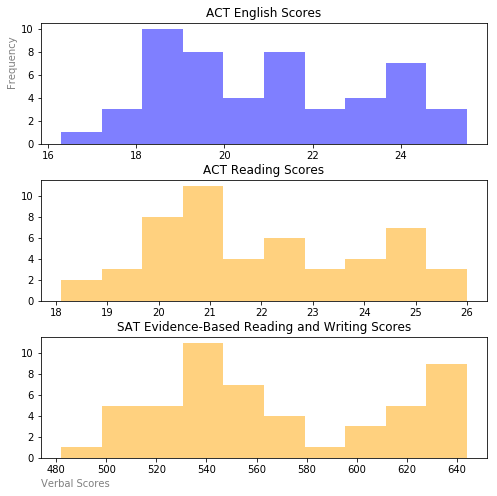

In [35]:
fig, ax = plt.subplots(3,figsize=(8,8))
ax[0].hist(merged['ACT_English'], bins = 10, color='b', alpha = 0.5)
ax[1].hist(merged['ACT_Reading'], bins = 10, color='orange', alpha = 0.5)
ax[2].hist(merged['SAT_Evidence-Based Reading and Writing'], bins = 10, color='orange', alpha = 0.5)
plt.xlabel("Verbal Scores", position = (0,0), ha = 'left', color = 'grey')
plt.ylabel("Frequency", position = (0, 3.5), ha = 'right', color = 'grey')
fig.subplots_adjust(hspace=.3)
ax[0].title.set_text('ACT English Scores')
ax[1].title.set_text('ACT Reading Scores')
ax[2].title.set_text('SAT Evidence-Based Reading and Writing Scores')

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That the data is distribution normally.

##### 20. Does this assumption hold true for any of our columns? Which?

No -- none of the data are distributed normally.

##### 21. Plot some scatterplots examining relationships between all variables.

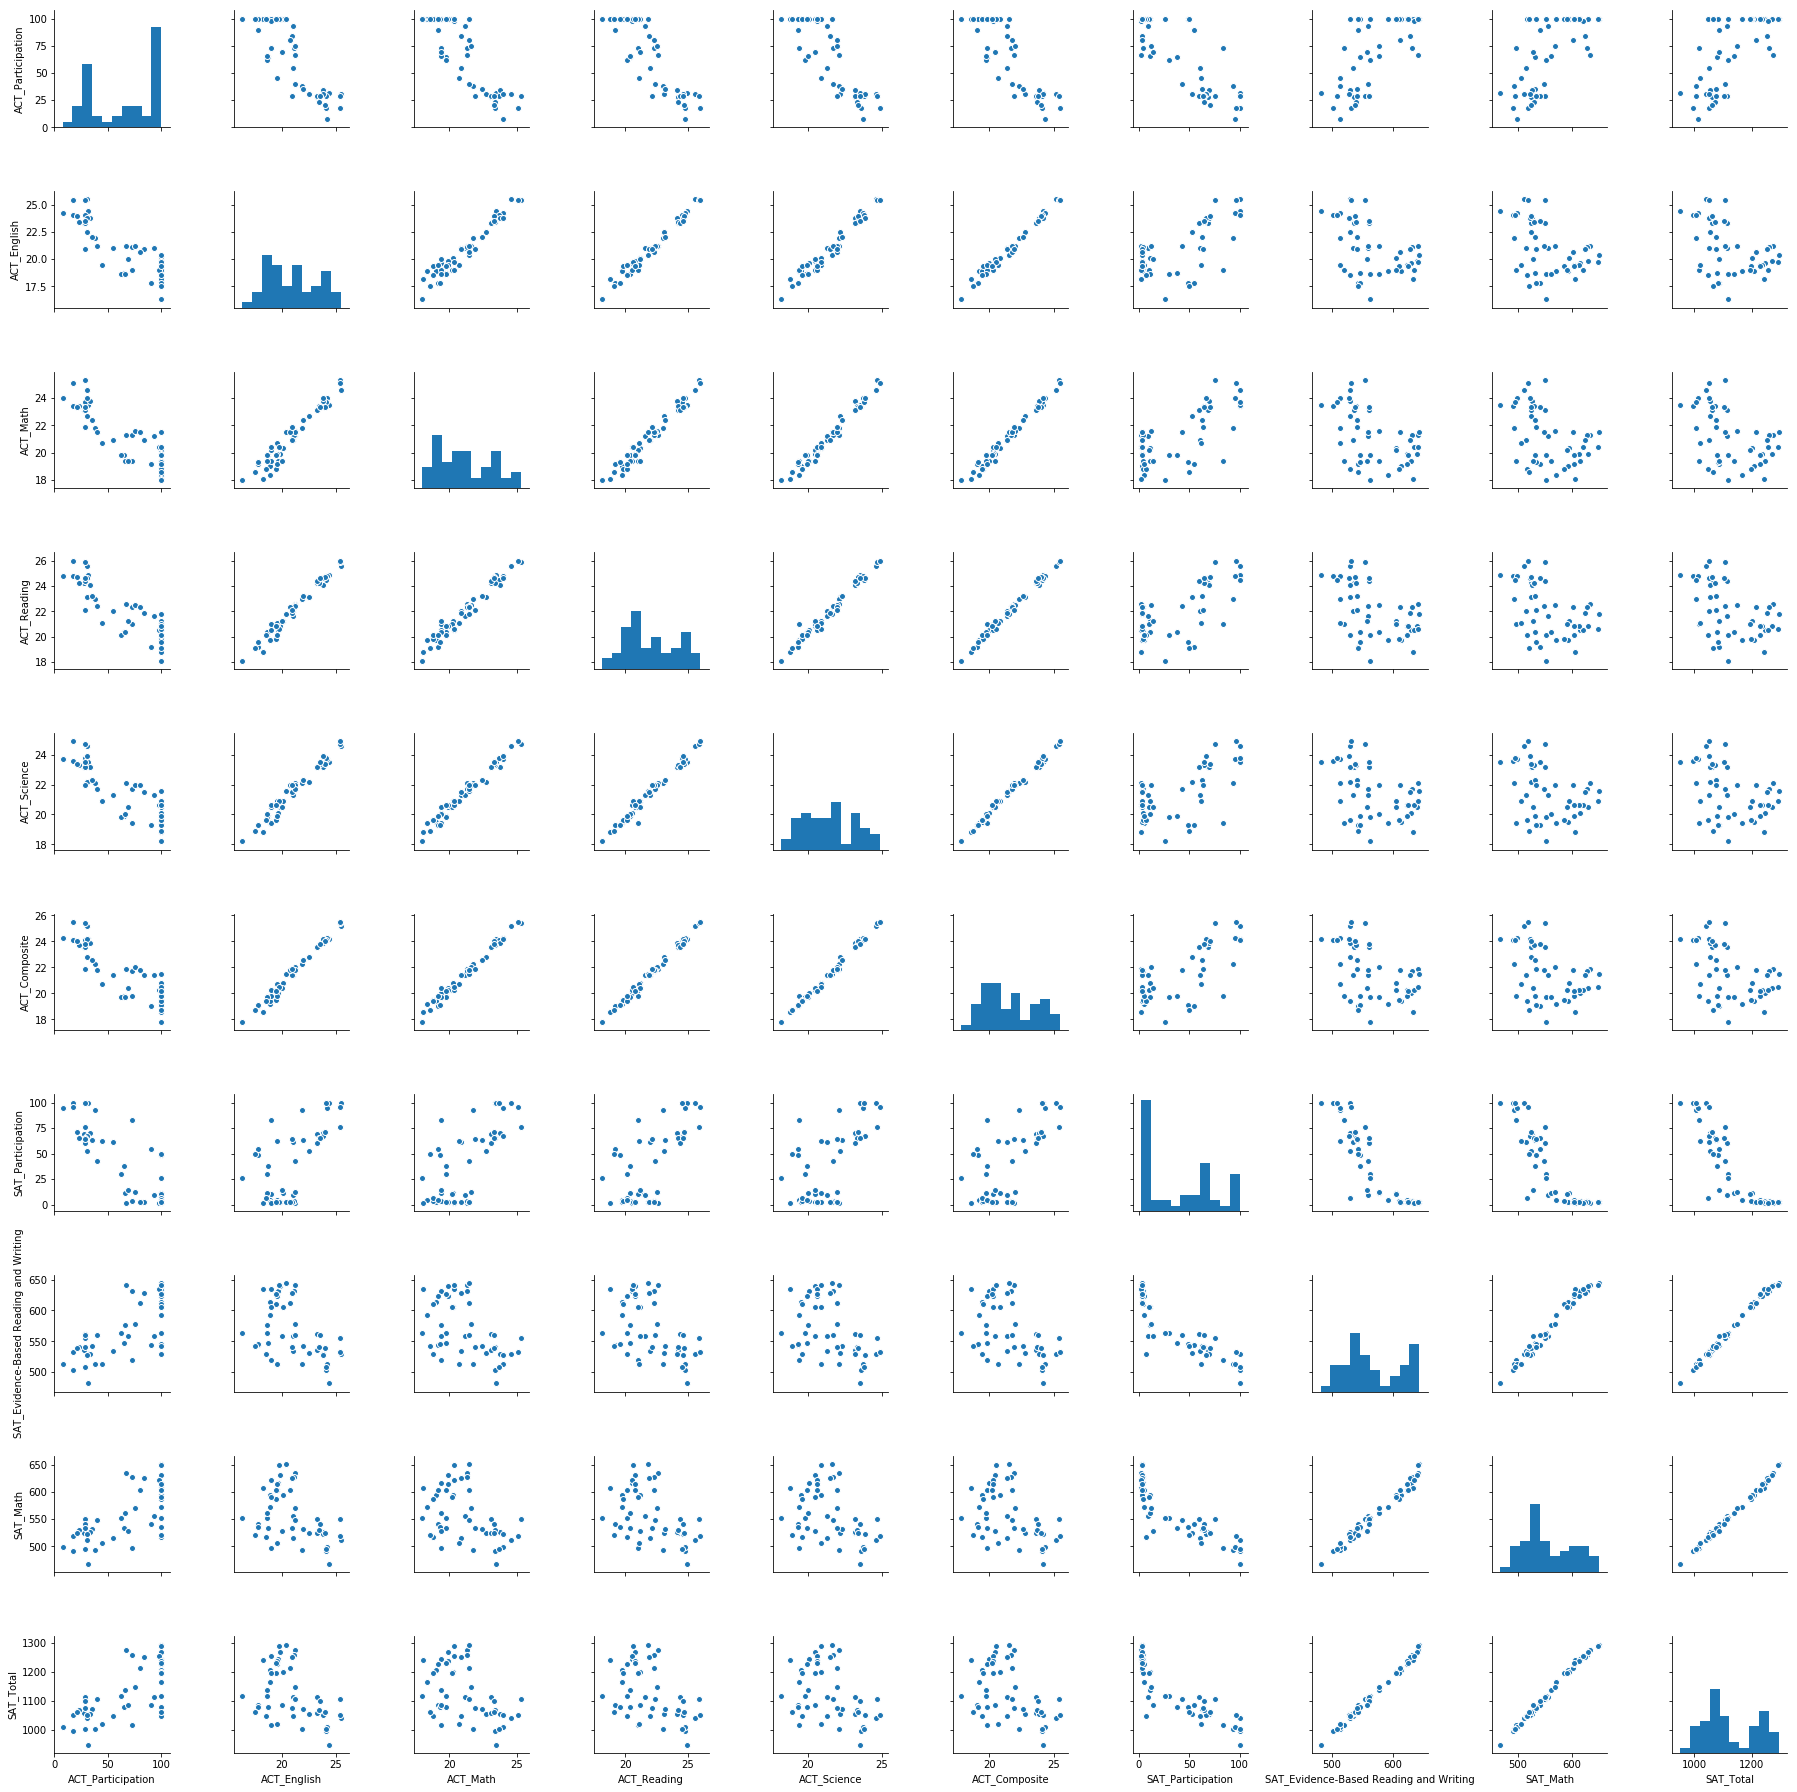

In [36]:
sns.pairplot(merged)

In [37]:
merged.head()

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


##### 22. Are there any interesting relationships to note?

* Positive linear relationships exist between scores in a given subject, such as reading, with scores in other subjects, such as math, in a given test type (ACT / SAT).



* There is a negative linear relationship between (SAT math, verbal, and total scores) and (SAT Participation)... implying that a high participation rate might be involuntary on behalf of the students, thus the students that are taking these tests involuntarily are not focused and/or not prepared to take the tests and score well. See literature here: http://www.baltimoresun.com/news/maryland/education/bs-md-sat-ap-scores-20141007-story.html

##### 23. Create box plots for each variable.

In [38]:
merged.columns

Index(['State', 'ACT_Participation', 'ACT_English', 'ACT_Math', 'ACT_Reading',
       'ACT_Science', 'ACT_Composite', 'SAT_Participation',
       'SAT_Evidence-Based Reading and Writing', 'SAT_Math', 'SAT_Total'],
      dtype='object')

Text(0.5,1,'Participation Rates')

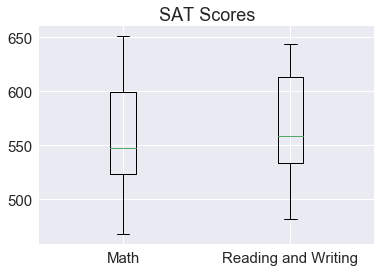

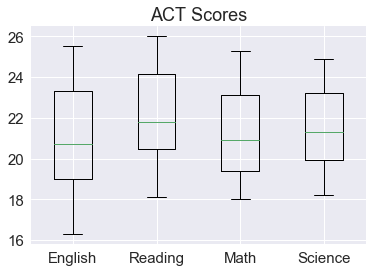

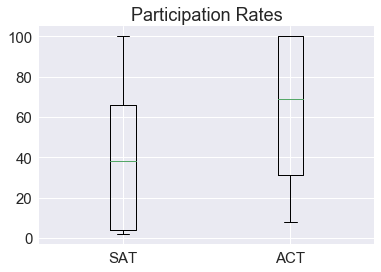

In [136]:
sat_clean_boxplots = [merged['SAT_Math'],
                      merged['SAT_Evidence-Based Reading and Writing']]
sat_labels = ('Math', 'Reading and Writing')
plt.figure(1)
plt.boxplot(sat_clean_boxplots, labels = sat_labels)
plt.title('SAT Scores')

act_clean_boxplots = [merged['ACT_English'],
                      merged['ACT_Reading'],
                      merged['ACT_Math'], 
                      merged['ACT_Science']]
act_labels = ('English', 'Reading', 'Math', 'Science')
plt.figure(2)
plt.boxplot(act_clean_boxplots, labels = act_labels)
plt.title('ACT Scores')

participation_boxplots = [merged['SAT_Participation'],
                          merged['ACT_Participation']]
part_labels = ('SAT', 'ACT')
plt.figure(3)
plt.boxplot(participation_boxplots, labels = part_labels)
plt.title('Participation Rates')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [49]:
#n/a

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

According to [this link](http://bolt.mph.ufl.edu/6050-6052/unit-1/one-quantitative-variable-introduction/describing-distributions/), When describing distributions, data scientists care about the following three things:

* center - the value (usually the mean, but also sometimes median or mode) that roughly divides the distribution into equal halves
* spread - describes the range of the data (standard deviation, range)
* shape - symmetry/skewness of the distribution

Below, I will describe the center, spread, and shape of each distribution.

### ACT Distribution Descriptions

In [50]:
describe_ACT_stats = merged[['ACT_Participation',
                         'ACT_English',
                         'ACT_Math',
                         'ACT_Reading',
                         'ACT_Science',
                         'ACT_Composite']].describe()

In [51]:
ACT_skewness = pd.DataFrame(merged[['ACT_Participation',
                                'ACT_English',
                                'ACT_Math',
                                'ACT_Reading',
                                'ACT_Science',
                                'ACT_Composite']].skew()).T

ACT_skewness.rename({0: 'skew'}, axis='index', inplace=True)

In [52]:
describe_ACT_stats = describe_ACT_stats.append(ACT_skewness)

In [53]:
describe_ACT_stats.loc[['mean','std','skew']]

,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
skew,-0.197989,0.352660,0.332683,0.269366,0.218823,0.319810


### SAT Distribution Descriptions

In [54]:
describe_SAT_stats = merged[['SAT_Participation',
                             'SAT_Evidence-Based Reading and Writing',
                             'SAT_Math',
                             'SAT_Total']].describe()

In [55]:
SAT_skewness = pd.DataFrame(merged[['SAT_Participation',
                                    'SAT_Evidence-Based Reading and Writing',
                                    'SAT_Math',
                                    'SAT_Total']].skew()).T

SAT_skewness.rename({0: 'skew'}, axis='index', inplace=True)

In [56]:
describe_SAT_stats = describe_SAT_stats.append(SAT_skewness)

In [57]:
describe_SAT_stats.loc[['mean','std','skew']]

,SAT_Participation,SAT_Evidence-Based Reading and Writing,SAT_Math,SAT_Total
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
skew,0.346450,0.272693,0.365040,0.310903


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

We can ascertain certain relationship groups by visually inspecting a heatmap and describe the relationships in three large groups:
* ACT Participation vs. ACT Test Scores (**yellow boxes in col 1**): significant negative correlation (-0.84 and below)


* ACT Participation vs. SAT Test Scores (**light blue boxes in col 1**): significant positive correlation (0.68 and above). The conclusion that we can reach is that states with high ACT Participation have low SAT Participation, and we know that the lower the participation rate for a given test, the higher the scores for that test.


* Scores in one section vs. scores in another section of a test (**dark blue boxes in top left and bottom right quadrants**): 1:1 or almost 1:1 positive relationship

Note: NO significant relationship exists between ACT and SAT scores

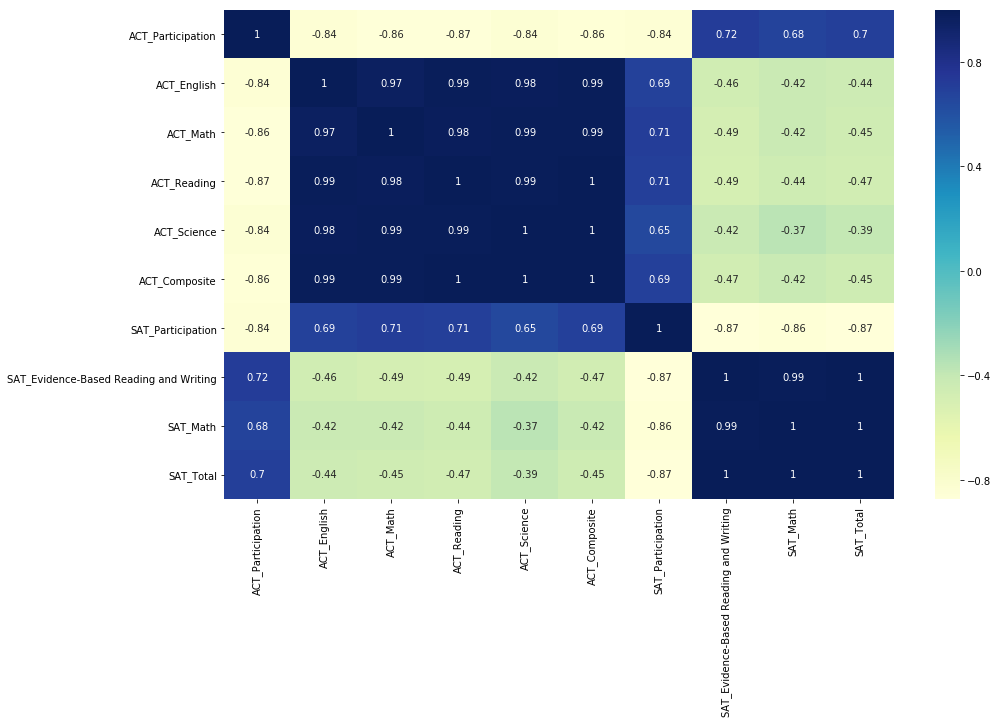

In [58]:
plt.figure(figsize = (15,9));
sns.heatmap(merged.corr(), annot = True, cmap="YlGnBu");

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

$H_0$  = there is no difference in the average participation rate in the two exams, SAT and ACT

$H_A$  = there is a non-zero difference in the average participation in the two exams, SAT and ACT

First we must find a p-value:

In [59]:
print(merged['SAT_Participation'].mean() - merged['ACT_Participation'].mean())
print("^ Negative says that the mean of the experimental group, SAT_Participation, was LOWER")

-25.450980392156858
^ Negative says that the mean of the experimental group, SAT_Participation, was LOWER


In [60]:
t_stat, p_value = stats.ttest_ind(merged['SAT_Participation'],
                                  merged['ACT_Participation'])
t_stat, p_value

(-3.8085778908170544, 0.00024134203698662353)

We have a p-value of 0.0002, which is less than a = 0.05, thus we can reject the null hypothesis (aka, there IS a statistically significant, non-zero difference, in the average participation rate of the two exams).

Thus, since the SAT Participation was statistically lower, there is room for participation rates to increase.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [61]:
z_star = 1.96
n = len(merged)

In [62]:
sample_mean_SAT = merged['SAT_Participation'].mean()
sigma_SAT = merged['SAT_Participation'].std()

low_end_SAT = sample_mean_SAT - z_star * sigma_SAT / n ** 0.5

high_end_SAT = sample_mean_SAT + z_star * sigma_SAT / n ** 0.5

In [63]:
(low_end_SAT,high_end_SAT)

(30.122077111168757, 49.48576602608615)

If we pulled 10 samples,  we expect that 9.5 of the sample means would fall in between the values specified in the confidence interval (30.122, 49.485)

In [64]:
sample_mean_ACT = merged['ACT_Participation'].mean()
sigma_ACT = merged['ACT_Participation'].std()

low_end_ACT = sample_mean_ACT - z_star * sigma_ACT / n ** 0.5

high_end_ACT = sample_mean_ACT + z_star * sigma_ACT / n ** 0.5

In [65]:
(low_end_ACT,high_end_ACT)

(56.43369049287186, 74.07611342869676)

In [75]:
print(merged['ACT_Participation'].mean())
print(merged['SAT_Participation'].mean())

65.25490196078431
39.80392156862745


If we pulled 10 samples,  we expect that 9.5 of the sample means would fall in between the values specified in the confidence interval (56.433, 74.076)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, my answer to 27 is not surprising - you can see that there exists a difference in the lower and upper bounds of the confidence intervals for each of the ACT and SAT participation rates.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Text(0.5,1,'ACT Math x SAT Math')

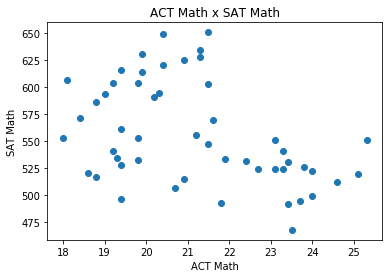

In [66]:
plt.scatter(merged["ACT_Math"], merged["SAT_Math"])
plt.ylabel('SAT Math')
plt.xlabel('ACT Math')
plt.title("ACT Math x SAT Math")

In [67]:
np.corrcoef(merged["ACT_Math"], merged["SAT_Math"])

array([[ 1.        , -0.42045604],
       [-0.42045604,  1.        ]])

Yes, it appropriate to generate a correlation between ACT_Math and SAT_Math scores. There seems to be a loose inverse correlation between ACT Math scores and SAT Math scores (that is, in a given state, as ACT Math scores are high, then SAT Math scores are low).

This may be explained by the fact that states with high scores have low participation rates for that exam, thus implying high participation rates in the other exam, which implies low scores in the other exam.

This can help conclude that states with low ACT scores have high ACT participation rates, and probably have deals with ACT, Inc. in which the ACT is required in that state. Thus, the College Board should not target those states, but rather states with roughly equal participation, as those states likely do not have deals with either College Board or with ACT, Inc.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

We have only generalized means from each state in the data we have. So to compare the SAT and ACT data overall (nationally), we need the discrete data from each test (aka, not bounded by State). So, we cannot conduct statistical inference given the data we have, which happens to be artificially bounded by state.